In [4]:
import numpy as np
import pandas as pd
import burst_detector as bd
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['R_HOME'] = "C:\Program Files\R\R-4.2.2" #path to your R installation
os.environ['PATH'] = "C:\Program Files\R\R-4.2.2\bin\x64\R.dll" + os.environ['PATH']

from rpy2 import robjects
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
robjects.r["load"]("../data/bursting/sim_results.RData")
sim_results = robjects.r['sim.results']

In [7]:
def convert(res):
    mi = 2
    logisi = 7
    
    df = pd.DataFrame(np.array(res).T, columns=["sib","n_bursts","method"])
    
    mi = np.array(df.loc[df["method"]==mi, "sib"])/100
    logisi = np.array(df.loc[df["method"]==logisi, "sib"])/100
    
    return mi, logisi

In [129]:
def convert_fp(res):
    mi = 2
    logisi = 7
    
    df = pd.DataFrame(np.array(res).T, columns=["tp","fp","method"])
    mi_tp = np.array(np.array(df.loc[df["method"]==mi, "tp"]))
    mi_fp = np.array(np.array(df.loc[df["method"]==mi, "fp"]))
    
    logisi_tp = np.array(np.array(df.loc[df["method"]==logisi, "tp"]))
    logisi_fp = np.array(np.array(df.loc[df["method"]==logisi, "fp"]))
    
    return mi_tp, mi_fp, logisi_tp, logisi_fp

In [135]:
# load kleinberg base results
d5_base = np.load("../results/bursting/d5_base.npy", allow_pickle=True)
d6_base = np.load("../results/bursting/d6_base.npy", allow_pickle=True)
d7_base = np.load("../results/bursting/d7_base.npy", allow_pickle=True)
d9_base = np.load("../results/bursting/d9_base.npy", allow_pickle=True)
d10_base = np.load("../results/bursting/d10_base.npy", allow_pickle=True)
d11_base = np.load("../results/bursting/d11_base.npy", allow_pickle=True)
d11_base_tp = np.load("../results/bursting/d11_base_tp.npy", allow_pickle=True)
d11_base_fp = np.load("../results/bursting/d11_base_fp.npy", allow_pickle=True)

# load kleinberg em results
d5_em = np.load("../results/bursting/d5_em.npy", allow_pickle=True)
d6_em = np.load("../results/bursting/d6_em.npy", allow_pickle=True)
d7_em = np.load("../results/bursting/d7_em.npy", allow_pickle=True)
d9_em = np.load("../results/bursting/d9_em.npy", allow_pickle=True)
d10_em = np.load("../results/bursting/d10_em.npy", allow_pickle=True)
d11_em = np.load("../results/bursting/d11_em.npy", allow_pickle=True)
d11_em_tp = np.load("../results/bursting/d11_em_tp.npy", allow_pickle=True)
d11_em_fp = np.load("../results/bursting/d11_em_fp.npy", allow_pickle=True)

In [136]:
# load mi, logisi results
d5_mi, d5_log = convert(sim_results.rx2("non.bursting"))
d6_mi, d6_log = convert(sim_results.rx2("non.stationary"))
d7_mi, d7_log = convert(sim_results.rx2("reg.bursting"))
d9_mi, d9_log = convert(sim_results.rx2("long.bursts"))
d10_mi, d10_log = convert(sim_results.rx2("high.freq"))
d11_mi_tp, d11_mi_fp, d11_log_tp, d11_log_fp = convert_fp(sim_results.rx2("noisy.bursts"))

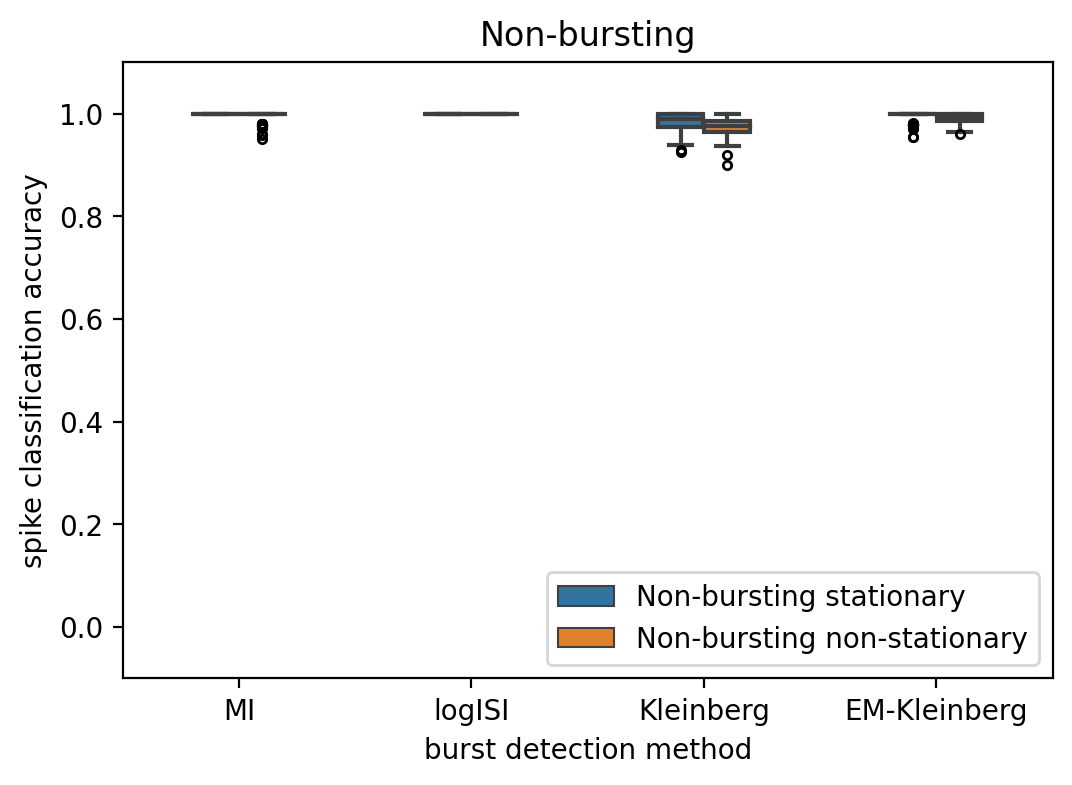

In [143]:
plt.figure(figsize=(6,4))

df5 = [d5_mi, d5_log, d5_base, d5_em]
vals = 1-np.concatenate(df5)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df5 = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="Non-bursting stationary")

df6 = [d6_mi, d6_log, d6_base, d6_em]
vals = 1-np.concatenate(df6)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df6 = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="Non-bursting non-stationary")

non_burst_df = pd.concat((df5, df6), ignore_index=True)

flierprops = dict(marker='o', markerfacecolor='None', markersize=3,  markeredgecolor='black', linewidth=0.5)
sns.boxplot(non_burst_df, x="lbl", y="value", orient="v", hue="spike_train", flierprops=flierprops, width=.4); plt.ylim([-.1, 1.1])
plt.ylabel("spike classification accuracy"); plt.xlabel("burst detection method");

plt.legend(); plt.title("Non-bursting");
plt.savefig("../figures/poster/bursting/non_burst.svg", transparent=True)

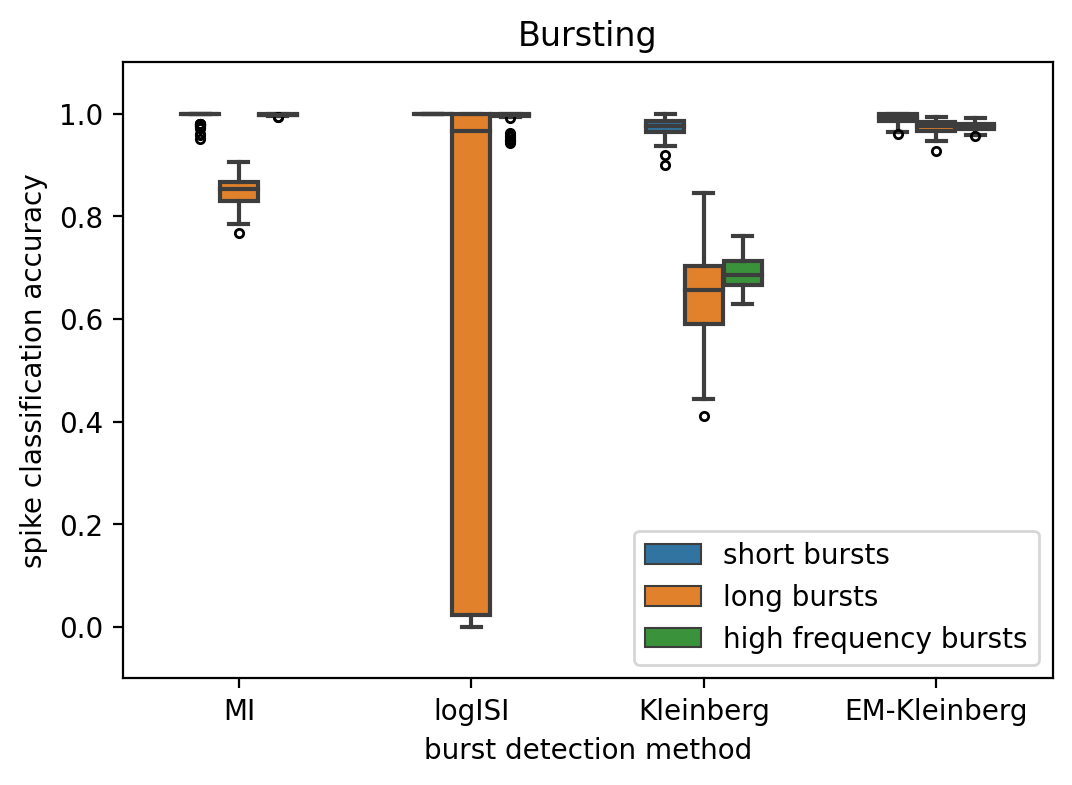

In [144]:
plt.figure(figsize=(6,4))

df7 = [d7_mi, d7_log, d7_base, d7_em]
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df7 = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="short bursts")

df9 = [d9_mi, d9_log, d9_base, d9_em]
vals = np.concatenate(df9)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df9 = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="long bursts")

df10 = [d10_mi, d10_log, d10_base, d10_em]
vals = np.concatenate(df10)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df10 = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="high frequency bursts")

burst_df = pd.concat((df7, df9, df10), ignore_index=True)

flierprops = dict(marker='o', markerfacecolor='None', markersize=3,  markeredgecolor='black', linewidth=0.5)
sns.boxplot(burst_df, x="lbl", y="value", orient="v", hue="spike_train", flierprops=flierprops, width=.5); plt.ylim([-.1, 1.1])
plt.ylabel("spike classification accuracy"); plt.xlabel("burst detection method");

plt.legend(); plt.title("Bursting");
plt.savefig("../figures/poster/bursting/burst.svg", transparent=True)

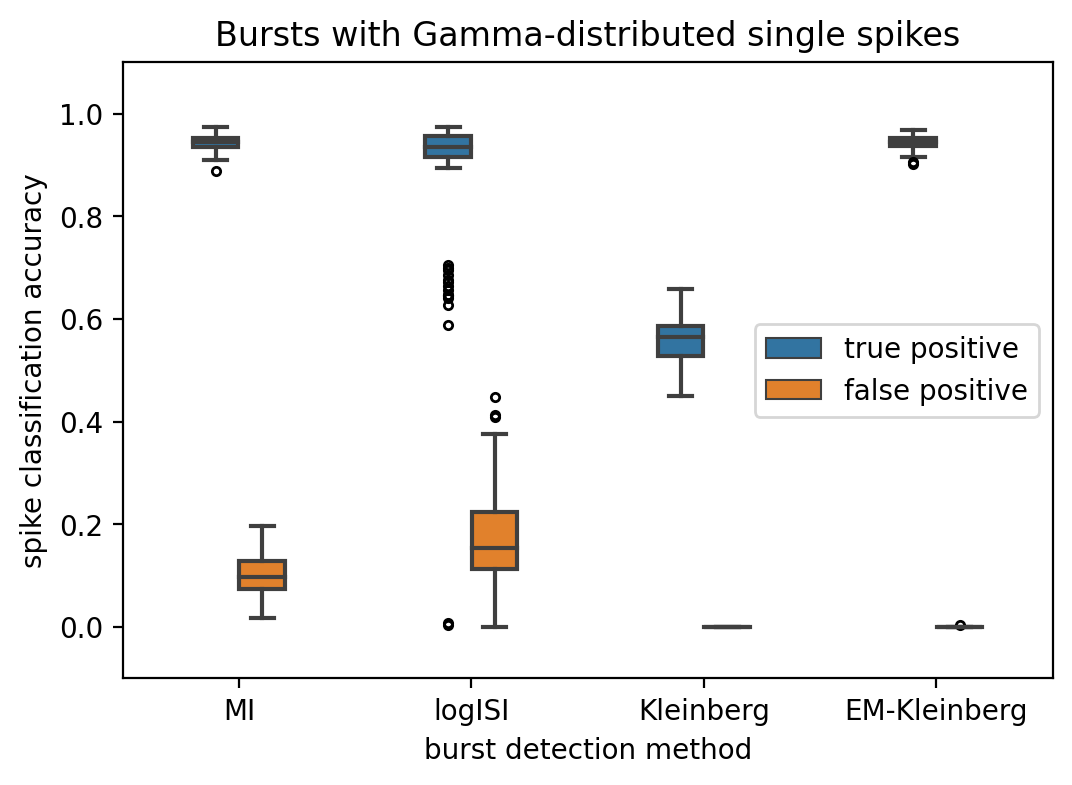

In [145]:
plt.figure(figsize=(6,4))

df11_tp = [d11_mi_tp, d11_log_tp, d11_base_tp, d11_em_tp]
vals = np.concatenate(df11_tp)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df11_tp = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="true positive")

df11_fp = [d11_mi_fp, d11_log_fp, d11_base_fp, d11_em_fp]
vals = np.concatenate(df11_fp)
lbl = np.concatenate((np.array(["MI"]*100), np.array(["logISI"]*100), np.array(["Kleinberg"]*100), np.array(["EM-Kleinberg"]*100)))
df11_fp = pd.DataFrame({"value": vals, "lbl": lbl}).assign(spike_train="false positive")

noisy_burst_df = pd.concat((df11_tp, df11_fp), ignore_index=True)

flierprops = dict(marker='o', markerfacecolor='None', markersize=3,  markeredgecolor='black', linewidth=0.5)
sns.boxplot(noisy_burst_df, x="lbl", y="value", orient="v", hue="spike_train", flierprops=flierprops, width=.4); plt.ylim([-.1, 1.1])
plt.ylabel("spike classification accuracy"); plt.xlabel("burst detection method");

plt.legend(); plt.title("Bursts with Gamma-distributed single spikes");
plt.savefig("../figures/poster/bursting/noise_burst.svg", transparent=True)